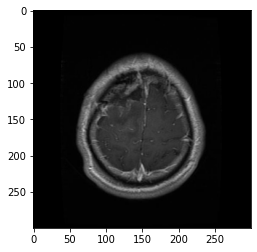

In [26]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = '/Users/james/MScCode/Final Project/Datasets/test_dataset'

saved = np.load(os.path.join(path,'features.npy'))

plt.imshow(saved[].reshape(300,300,3))